# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [107]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: Import the OHLCV dataset into a Pandas DataFrame.

In [108]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

C:\Users\dinau\AppData\Local\Temp\ipykernel_26172\1940832839.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ohlcv_df = pd.read_csv(
C:\Users\dinau\AppData\Local\Temp\ipykernel_26172\1940832839.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ohlcv_df = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [109]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [110]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495


In [111]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0


In [112]:
signals_df['Signal'].value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [113]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0,NaN
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0,0.000000
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0,0.000803
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0,0.000401
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0,0.001202


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0,-0.000896


<Axes: xlabel='date'>

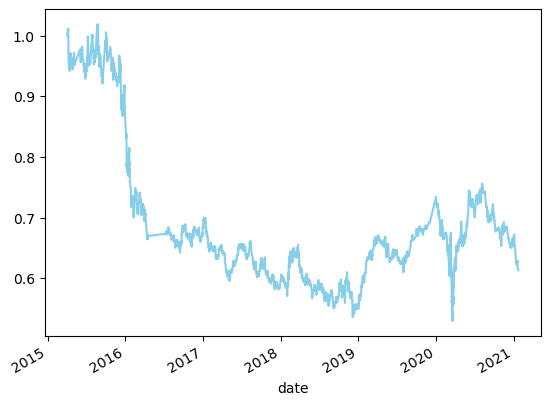

In [114]:
# Plot Strategy Returns to examine performance 
(1 + signals_df['Strategy Returns']).cumprod().plot(color='skyblue')

### Step 3: Split the data into training and testing datasets.

In [115]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [116]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [117]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [118]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2015-07-02 15:00:00


In [119]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [120]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [121]:
# Scale the features DataFrames
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [122]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()

# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
print(svm_pred)


[1. 1. 1. ... 1. 1. 1.]


### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [123]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [124]:

# Create a new empty predictions DataFrame:
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df['Actual Returns'].loc[X_test.index]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = signals_df['Strategy Returns'].loc[X_test.index]

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())


,Predicted,Actual Returns,Strategy Returns
date,,,
2015-07-06 10:00:00,1.0,-0.025715,0.025715
2015-07-06 10:45:00,1.0,0.007237,-0.007237
2015-07-06 14:15:00,1.0,-0.009721,-0.009721
2015-07-06 14:30:00,1.0,-0.003841,0.003841
2015-07-07 11:30:00,1.0,-0.018423,0.018423


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,-0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

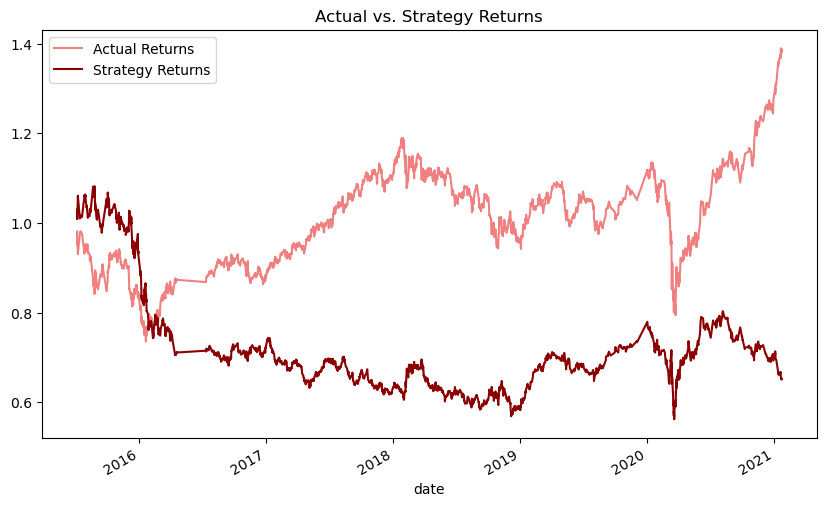

In [125]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
    figsize=(10, 6), 
    title="Actual vs. Strategy Returns",
    color=['lightcoral', 'darkred']  
)
plt.savefig("baseline_returns_plot.png")
plt.show()

---

## Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

In [129]:
# Step 1: Tune the training algorithm by adjusting the size of the training dataset.
# To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your README.md file.

# Define different training window sizes (e.g., 3 months, 6 months, 9 months)
training_window_sizes = [DateOffset(months=3), DateOffset(months=6), DateOffset(months=9)]

# Create a dictionary to store results
tuning_results = {}

for window_size in training_window_sizes:
    # Select the ending period for the training data with an offset of the specified window size
    training_end = X.index.min() + window_size

    # Generate the X_train and y_train DataFrames
    X_train = X.loc[training_begin:training_end]
    y_train = y.loc[training_begin:training_end]

    # Check if there is sufficient data for training
    if len(X_train) == 0:
        continue

    # Scale the features DataFrames
    scaler = StandardScaler()
    X_scaler = scaler.fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Fit the model with the updated training data
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    svm_pred = svm_model.predict(X_test_scaled)

    # Create a predictions DataFrame
    predictions_df = pd.DataFrame(index=X_test.index)
    predictions_df['Predicted'] = svm_pred
    predictions_df['Actual Returns'] = signals_df['Actual Returns'].loc[X_test.index]
    predictions_df['Strategy Returns'] = signals_df['Strategy Returns'].loc[X_test.index]

    # Store the results in the dictionary
    tuning_results[f'Training Window: {window_size}'] = predictions_df

    # Print or display results for comparison
    print(f"Results for Training Window: {window_size}")
    display(predictions_df.head())

Results for Training Window: <DateOffset: months=3>


,Predicted,Actual Returns,Strategy Returns
date,,,
2017-03-08 15:45:00,1.0,-0.000894,0.000894
2017-03-09 09:45:00,1.0,-0.003581,0.003581
2017-03-09 10:15:00,1.0,-0.000449,0.000449
2017-03-09 10:30:00,1.0,-0.001798,0.001798
2017-03-09 11:00:00,1.0,-0.000900,0.000900


Results for Training Window: <DateOffset: months=6>


,Predicted,Actual Returns,Strategy Returns
date,,,
2017-03-08 15:45:00,1.0,-0.000894,0.000894
2017-03-09 09:45:00,1.0,-0.003581,0.003581
2017-03-09 10:15:00,1.0,-0.000449,0.000449
2017-03-09 10:30:00,1.0,-0.001798,0.001798
2017-03-09 11:00:00,1.0,-0.000900,0.000900


Results for Training Window: <DateOffset: months=9>


,Predicted,Actual Returns,Strategy Returns
date,,,
2017-03-08 15:45:00,1.0,-0.000894,0.000894
2017-03-09 09:45:00,1.0,-0.003581,0.003581
2017-03-09 10:15:00,1.0,-0.000449,0.000449
2017-03-09 10:30:00,1.0,-0.001798,0.001798
2017-03-09 11:00:00,1.0,-0.000900,0.000900


### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

In [130]:
# Step 2: Tune the trading algorithm by adjusting the SMA input features.
# Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your README.md file.

# Define different SMA window sizes
short_window_sizes = [5, 10, 15]
long_window_sizes = [50, 100, 200]

# Create a dictionary to store results
tuning_results_sma = {}

for short_window in short_window_sizes:
    for long_window in long_window_sizes:
        # Generate the fast and slow simple moving averages
        signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
        signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()
        signals_df = signals_df.dropna()

        # Check if there is sufficient data for training
        if len(signals_df) == 0:
            continue

        # Generate the Signal column
        signals_df['Signal'] = 0.0
        signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1
        signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

        # Calculate the strategy returns
        signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

        # Generate the X and y datasets
        X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
        y = signals_df['Signal']

        # Select the start and end dates for training data
        training_begin = X.index.min()
        training_end = X.index.min() + DateOffset(months=3)

        # Split the data into training and testing sets
        X_train = X.loc[training_begin:training_end]
        y_train = y.loc[training_begin:training_end]
        X_test = X.loc[training_end + DateOffset(hours=1):]
        y_test = y.loc[training_end + DateOffset(hours=1):]

        # Check if there is sufficient data for training
        if len(X_train) == 0:
            continue

        # Scale the features DataFrames
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Fit the model with the updated parameters
        svm_model.fit(X_train_scaled, y_train)

        # Make predictions on the testing data
        svm_pred = svm_model.predict(X_test_scaled)

        # Create a predictions DataFrame
        predictions_df = pd.DataFrame(index=X_test.index)
        predictions_df['Predicted'] = svm_pred
        predictions_df['Actual Returns'] = signals_df['Actual Returns'].loc[X_test.index]
        predictions_df
        
        # Calculate and print the classification report
        classification_rep = classification_report(y_test, svm_pred, zero_division=1)
        print(f"Classification Report for SMA Windows: {short_window}, {long_window}")
        print(classification_rep)
              
        # Print or display results for comparison
        print(f"Results for SMA Windows: {short_window}, {long_window}")
        display(predictions_df.head())

Classification Report for SMA Windows: 5, 50
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00      1243
         1.0       0.56      1.00      0.72      1594

    accuracy                           0.56      2837
   macro avg       0.78      0.50      0.36      2837
weighted avg       0.75      0.56      0.40      2837

Results for SMA Windows: 5, 50


,Predicted,Actual Returns
date,,
2017-03-23 10:00:00,1.0,-0.002626
2017-03-23 10:15:00,1.0,0.001755
2017-03-23 10:30:00,1.0,0.000876
2017-03-23 11:15:00,1.0,0.002626
2017-03-23 11:30:00,1.0,0.000000


Classification Report for SMA Windows: 5, 100
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00      1220
         1.0       0.56      1.00      0.72      1553

    accuracy                           0.56      2773
   macro avg       0.78      0.50      0.36      2773
weighted avg       0.75      0.56      0.40      2773

Results for SMA Windows: 5, 100


,Predicted,Actual Returns
date,,
2017-04-12 10:45:00,1.0,-0.000438
2017-04-12 11:00:00,1.0,0.000438
2017-04-12 12:00:00,1.0,-0.003504
2017-04-12 13:15:00,1.0,0.002198
2017-04-13 09:45:00,1.0,-0.001754


Classification Report for SMA Windows: 5, 200
              precision    recall  f1-score   support

        -1.0       0.38      0.02      0.04      1140
         1.0       0.56      0.97      0.71      1440

    accuracy                           0.55      2580
   macro avg       0.47      0.50      0.38      2580
weighted avg       0.48      0.55      0.41      2580

Results for SMA Windows: 5, 200


,Predicted,Actual Returns
date,,
2017-06-23 13:00:00,1.0,0.000831
2017-06-26 10:15:00,-1.0,0.006645
2017-06-26 10:30:00,-1.0,0.001856
2017-06-26 14:30:00,-1.0,-0.001853
2017-06-26 15:00:00,-1.0,-0.000825


Classification Report for SMA Windows: 10, 50
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00      1130
         1.0       0.56      1.00      0.72      1421

    accuracy                           0.56      2551
   macro avg       0.78      0.50      0.36      2551
weighted avg       0.75      0.56      0.40      2551

Results for SMA Windows: 10, 50


,Predicted,Actual Returns
date,,
2017-07-06 15:45:00,1.0,-0.014797
2017-07-07 10:15:00,1.0,-0.004172
2017-07-10 10:00:00,1.0,0.004189
2017-07-10 10:15:00,1.0,0.000000
2017-07-10 12:30:00,1.0,0.003338


Classification Report for SMA Windows: 10, 100
              precision    recall  f1-score   support

        -1.0       0.48      0.09      0.14      1090
         1.0       0.56      0.93      0.70      1355

    accuracy                           0.55      2445
   macro avg       0.52      0.51      0.42      2445
weighted avg       0.52      0.55      0.45      2445

Results for SMA Windows: 10, 100


,Predicted,Actual Returns
date,,
2017-08-14 09:30:00,1.0,0.008896
2017-08-14 09:45:00,1.0,-0.000802
2017-08-14 10:00:00,1.0,-0.000401
2017-08-14 10:15:00,1.0,0.002408
2017-08-14 10:45:00,1.0,0.001201


Classification Report for SMA Windows: 10, 200
              precision    recall  f1-score   support

        -1.0       0.44      0.03      0.05      1008
         1.0       0.55      0.97      0.71      1252

    accuracy                           0.55      2260
   macro avg       0.50      0.50      0.38      2260
weighted avg       0.51      0.55      0.41      2260

Results for SMA Windows: 10, 200


,Predicted,Actual Returns
date,,
2017-10-27 12:45:00,1.0,0.000000
2017-10-27 13:15:00,1.0,-0.000376
2017-10-27 13:30:00,1.0,0.000000
2017-10-27 13:45:00,1.0,0.000376
2017-10-27 14:15:00,1.0,0.000752


Classification Report for SMA Windows: 15, 50
              precision    recall  f1-score   support

        -1.0       0.26      0.01      0.01       977
         1.0       0.55      0.99      0.71      1214

    accuracy                           0.55      2191
   macro avg       0.41      0.50      0.36      2191
weighted avg       0.42      0.55      0.40      2191

Results for SMA Windows: 15, 50


,Predicted,Actual Returns
date,,
2017-11-14 15:45:00,1.0,-0.001509
2017-11-15 09:45:00,1.0,-0.009448
2017-11-15 10:15:00,1.0,0.002671
2017-11-15 10:30:00,1.0,0.002283
2017-11-15 11:45:00,1.0,0.001139


Classification Report for SMA Windows: 15, 100
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00       924
         1.0       0.55      1.00      0.71      1134

    accuracy                           0.55      2058
   macro avg       0.78      0.50      0.36      2058
weighted avg       0.75      0.55      0.39      2058

Results for SMA Windows: 15, 100


,Predicted,Actual Returns
date,,
2017-12-26 11:30:00,1.0,-0.002999
2017-12-26 15:00:00,1.0,0.001128
2017-12-27 10:30:00,1.0,0.001502
2017-12-27 11:15:00,1.0,0.000000
2017-12-27 11:30:00,1.0,-0.000750


Classification Report for SMA Windows: 15, 200
              precision    recall  f1-score   support

        -1.0       0.50      0.00      0.00       821
         1.0       0.55      1.00      0.71       996

    accuracy                           0.55      1817
   macro avg       0.52      0.50      0.36      1817
weighted avg       0.53      0.55      0.39      1817

Results for SMA Windows: 15, 200


,Predicted,Actual Returns
date,,
2018-02-28 15:45:00,1.0,-0.027144
2018-03-01 10:15:00,1.0,0.008557
2018-03-01 11:45:00,1.0,0.003320
2018-03-01 13:00:00,1.0,-0.005515
2018-03-01 13:45:00,1.0,-0.006285


### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

<Figure size 1000x600 with 0 Axes>

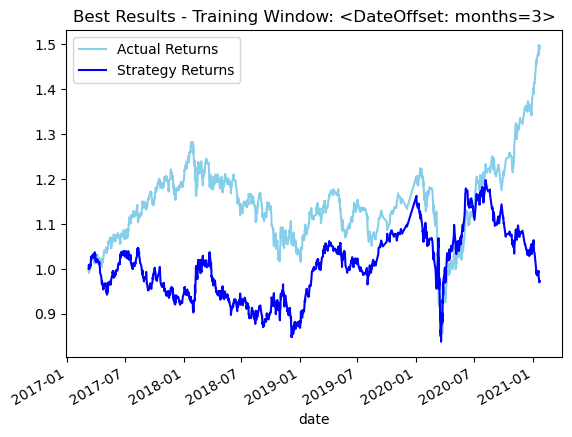

In [131]:
# Step 3: Choose the set of parameters that best improved the trading algorithm returns.
# Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your README.md file.

# Choose the best set of parameters based on the cumulative product of the strategy returns
best_results_key = max(tuning_results, key=lambda k: (1 + tuning_results[k]['Strategy Returns']).cumprod().iloc[-1])
best_results = tuning_results[best_results_key]

# Save a PNG image of the cumulative product plot
plt.figure(figsize=(10, 6))
(1 + best_results[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
    title=f"Best Results - {best_results_key}",
    color=['skyblue', 'blue']
)
plt.savefig("best_tuned_returns_plot.png")
plt.show()


# Plot the actual returns versus the strategy returns
# YOUR CODE HERE---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [153]:
# Step 1: Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
rf_model = RandomForestClassifier()


### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [154]:
# Fit the model to the data using the training data
rf_model = rf_model.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
rf_pred = rf_model.predict(X_test_scaled)

# Review the model's predicted values
print("Model's Predicted Values:")
print(rf_pred)

Model's Predicted Values:
[-1.  1.  1. ... -1. -1. -1.]


### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [155]:
# Use a classification report to evaluate the model using the predictions and testing data
rf_testing_report = classification_report(y_test, rf_pred)

# Print the classification report
print(rf_testing_report)


              precision    recall  f1-score   support

        -1.0       0.46      0.74      0.57       821
         1.0       0.57      0.29      0.38       996

    accuracy                           0.49      1817
   macro avg       0.51      0.51      0.47      1817
weighted avg       0.52      0.49      0.46      1817



In [156]:
# Create a new empty predictions DataFrame
rf_predictions_df = pd.DataFrame(index=X_test.index)

# Ensure that the lengths match before assigning values
if len(X_test) == len(rf_pred):
    # Add the Random Forest model predictions to the DataFrame
    rf_predictions_df['Predicted'] = rf_pred

    # Add the actual returns to the DataFrame
    rf_predictions_df['Actual Returns'] = signals_df['Actual Returns'].loc[X_test.index]

    # Add the strategy returns to the DataFrame
    rf_predictions_df['Strategy Returns'] = signals_df['Strategy Returns'].loc[X_test.index]

<Figure size 1000x600 with 0 Axes>

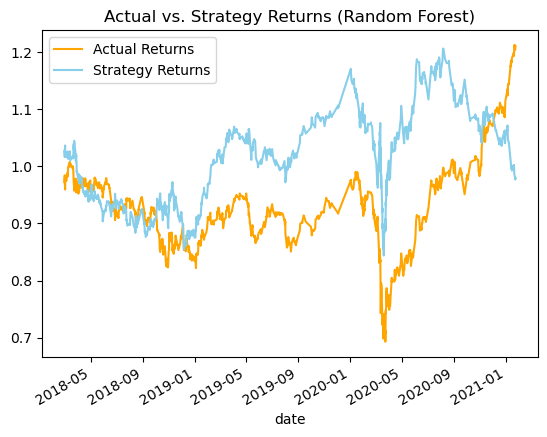

In [161]:
# Plot the actual returns versus the strategy returns
# Save a PNG image of the cumulative product of the actual returns vs. the strategy returns
plt.figure(figsize=(10, 6))
(1 + rf_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
    title="Actual vs. Strategy Returns (Random Forest)",
    color=['orange', 'skyblue']
)
plt.savefig("random_forest_returns_plot.png")
plt.show()  


## Confusion Matrix for all models for comparitive analysis purposes.

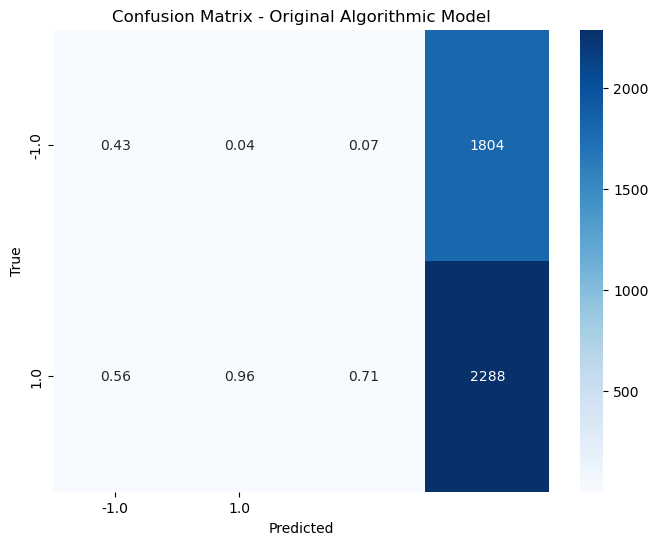

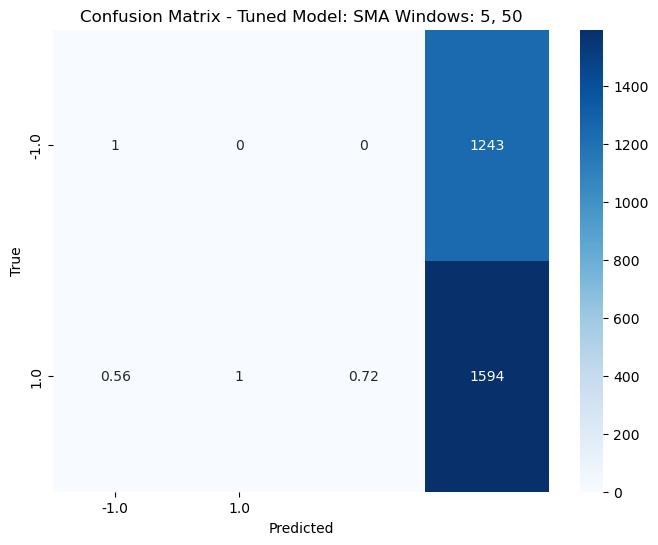

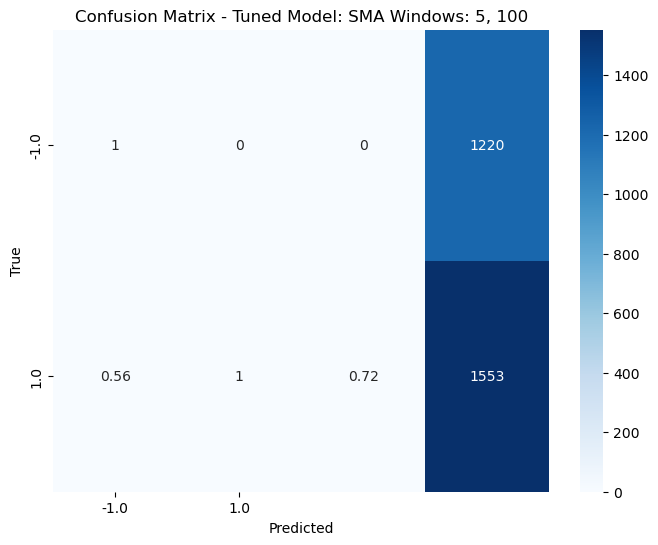

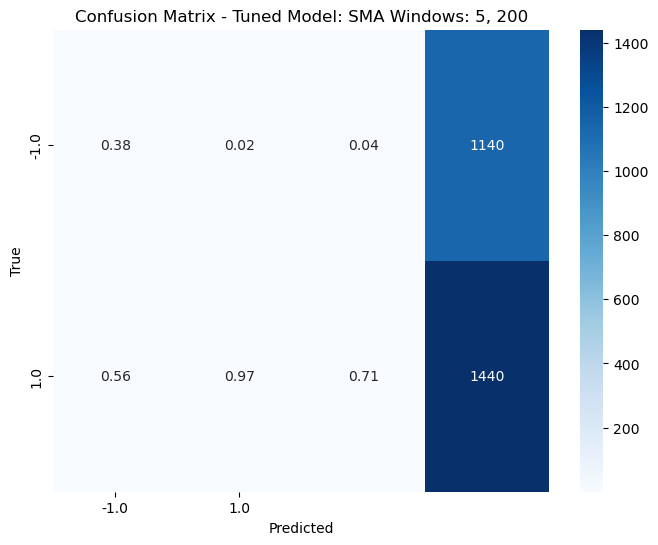

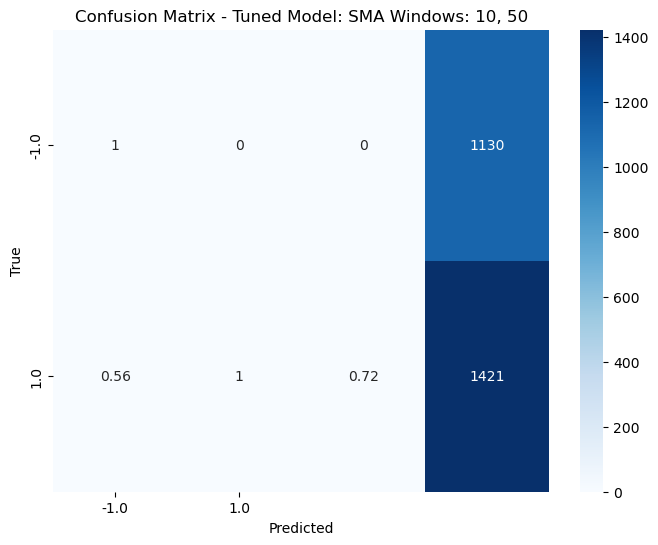

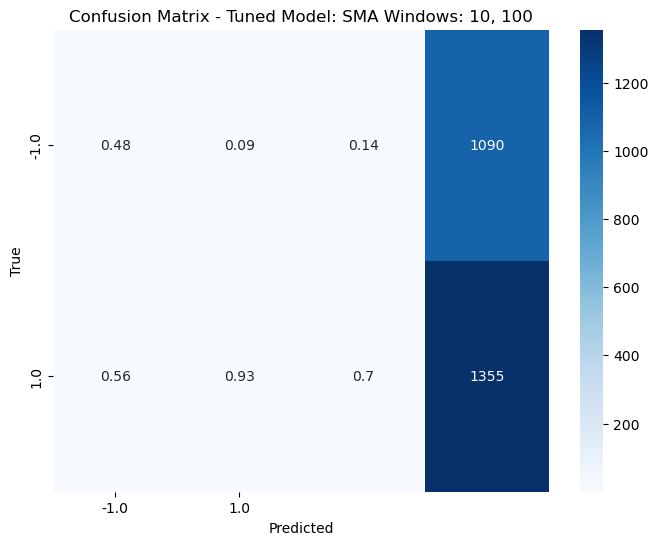

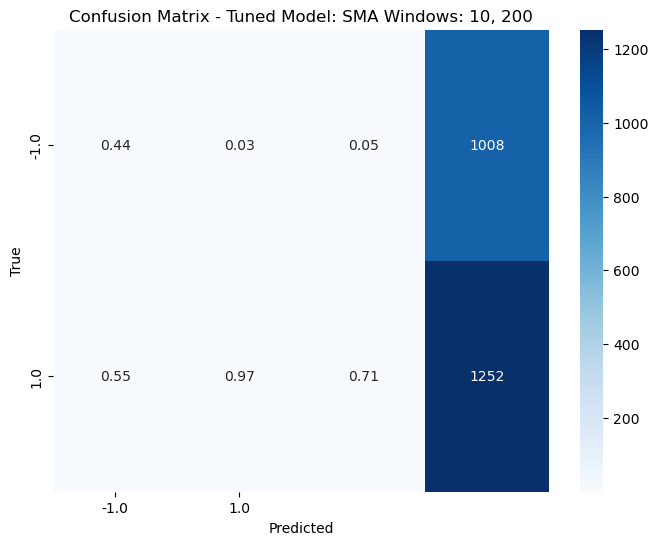

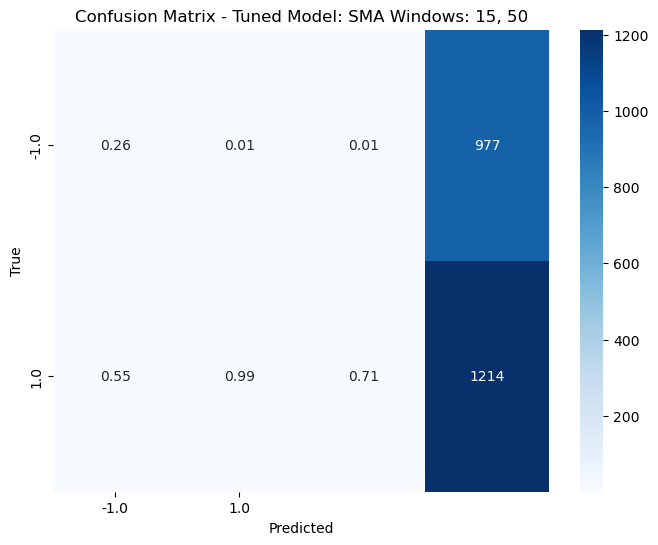

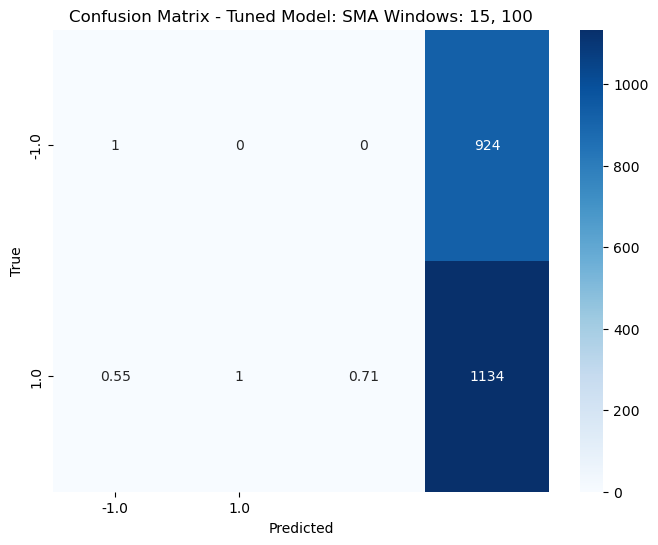

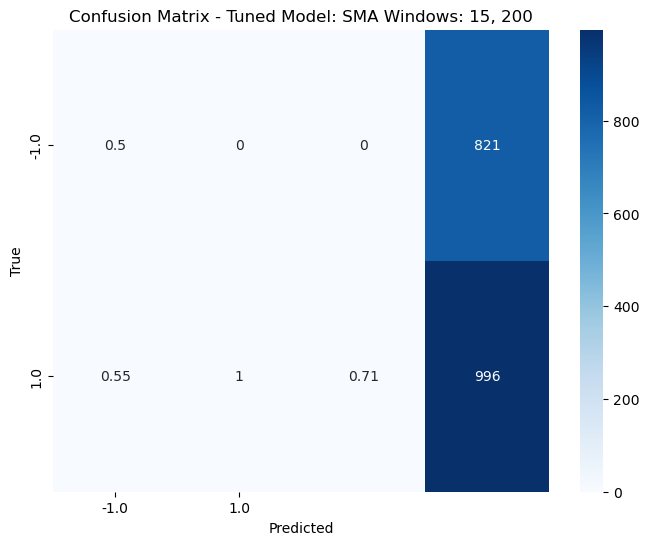

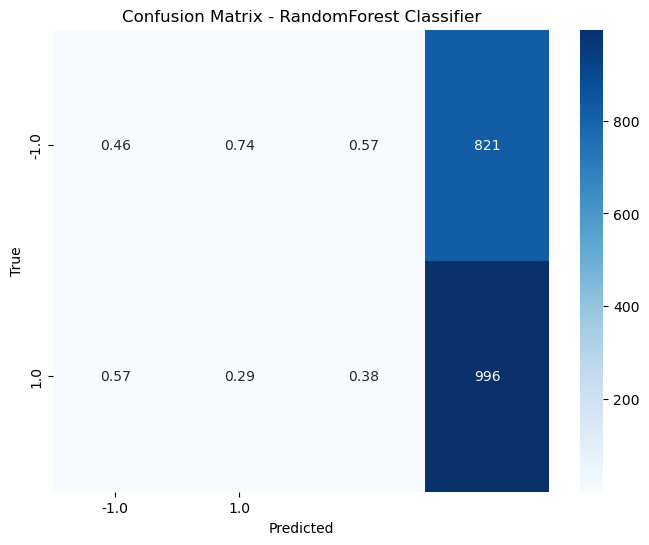

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the classification reports for each model
classification_reports = {
    "Original Algorithmic Model": """
                  precision   recall    f1-score  support

           -1.0       0.43      0.04      0.07      1804
            1.0       0.56      0.96      0.71      2288
    """,
    "Tuned Model: SMA Windows: 5, 50": """
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00      1243
        1.0       0.56      1.00       0.72      1594
    """,
    "Tuned Model: SMA Windows: 5, 100": """
              precision    recall   f1-score   support

        -1.0       1.00      0.00      0.00      1220
         1.0       0.56      1.00      0.72      1553
    """,
    "Tuned Model: SMA Windows: 5, 200": """
              precision    recall  f1-score   support

        -1.0       0.38      0.02      0.04      1140
         1.0       0.56      0.97      0.71      1440
    """,
    "Tuned Model: SMA Windows: 10, 50": """
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00      1130
         1.0       0.56      1.00      0.72      1421
    """,
    "Tuned Model: SMA Windows: 10, 100": """
              precision    recall  f1-score   support

        -1.0       0.48      0.09      0.14      1090
         1.0       0.56      0.93      0.70      1355
    """,
    "Tuned Model: SMA Windows: 10, 200": """
              precision    recall  f1-score   support

        -1.0       0.44      0.03      0.05      1008
         1.0       0.55      0.97      0.71      1252
    """,
    "Tuned Model: SMA Windows: 15, 50": """
              precision    recall  f1-score   support

        -1.0       0.26      0.01      0.01       977
         1.0       0.55      0.99      0.71      1214
    """,
    "Tuned Model: SMA Windows: 15, 100": """
              precision    recall  f1-score   support

        -1.0       1.00      0.00      0.00       924
         1.0       0.55      1.00      0.71      1134
    """,
    "Tuned Model: SMA Windows: 15, 200": """
              precision    recall  f1-score   support

        -1.0       0.50      0.00      0.00       821
         1.0       0.55      1.00      0.71       996
    """,
    "RandomForest Classifier": """
         precision     recall   f1-score    support

        -1.0       0.46      0.74      0.57       821
         1.0       0.57      0.29      0.38       996
    """
}


# Function to extract confusion matrix from classification report
def get_confusion_matrix(report):
    lines = report.strip().split('\n')
    classes = [float(line.split()[0]) for line in lines[2:]]
    cm_data = [list(map(float, line.split()[1:])) for line in lines[2:]]
    return cm_data, classes

# Function to plot confusion matrix and save heatmap as PNG
def plot_confusion_matrix(cm, classes, title, save_path):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(save_path)
    plt.show()

# Generate and plot confusion matrices for each model
for model, report in classification_reports.items():
    cm_data, classes = get_confusion_matrix(report)
    cm_array = np.array(cm_data)
    
    # Replace invalid characters in the filename
    model_filename = model.replace(" ", "_").replace(":", "_").replace(",", "_")
    
    save_path = f'confusion_matrix_{model_filename}.png'
    plot_confusion_matrix(cm_array, classes, f'Confusion Matrix - {model}', save_path)